<a href="https://colab.research.google.com/github/Faysoula/AI-Class-Projects/blob/main/F%26M_midterm_withclutch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HIIIIIIII

First lets import our libraries :)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.metrics import  classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


now lets read a few lines of the Data set :)

In [ ]:
#read the data set
df = pd.read_csv("/content/heart_disease.csv")
df.head()

,patient id,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart disease
0,1,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,54,1,3,150,195,0,0,122,0,0.0,1,0


Since the ID colomn is useless, we will kill it(drop it). moment of silence for the ID row.🫡

In [ ]:
#drop 'Patient ID' column
df = df.drop("patient id",axis = "columns")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart disease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Lets rename our columns bec the naming is sus

In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

Now lets check for annoying null values, tfeh

In [ ]:
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

LETS GOOOOOOOOOOOOOOOOOOOOOOOOO there are no

SINCE THE DATA IS ALL INTEGERS WE WONT TRY TO PUT SOME OF IT IN STRINGS BEC I WOULD LOVE TO SLEEP TONIGHT

#EDA TIME
---


In [ ]:
print(f"Number of rows: {len(df)} | Number of columns: {len(df.iloc[0])}")

Number of rows: 1000 | Number of columns: 12


So, there are 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [ ]:
abscence = (df['target'] == 0).sum()
presence = (df['target'] == 1).sum()
print(f"Number of patients without heart disease: {abscence} | Number of patients with heart disease: {presence}\nRatio: {abscence/presence:.2f}%")

Number of patients without heart disease: 460 | Number of patients with heart disease: 540
Ratio: 0.85%


so the data is balanced lets go.

In [ ]:
# summary statistics of numerical columns
df.describe(include =[np.number])

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.600000,0.78400,3.249000,132.27000,203.371000,0.224000,0.661000,138.181000,0.396000,0.916000,1.629000,0.540000
std,9.336336,0.41172,0.927286,18.28933,106.739593,0.417131,0.841895,25.453922,0.489309,1.069621,0.614603,0.498647
min,28.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.00000,3.000000,120.00000,179.750000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.00000,4.000000,130.00000,226.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.00000,4.000000,140.00000,268.000000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.00000,4.000000,200.00000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


From the above description, it's evident that both resting blood pressure and cholesterol display outliers. Notably, resting blood pressure and cholesterol feature minimum values of zero, which are likely inaccuracies. Additionally, cholesterol also exhibits outliers on the upper end, with a maximum recorded value of 603. we will address this later.(nshallah)

# Visualization

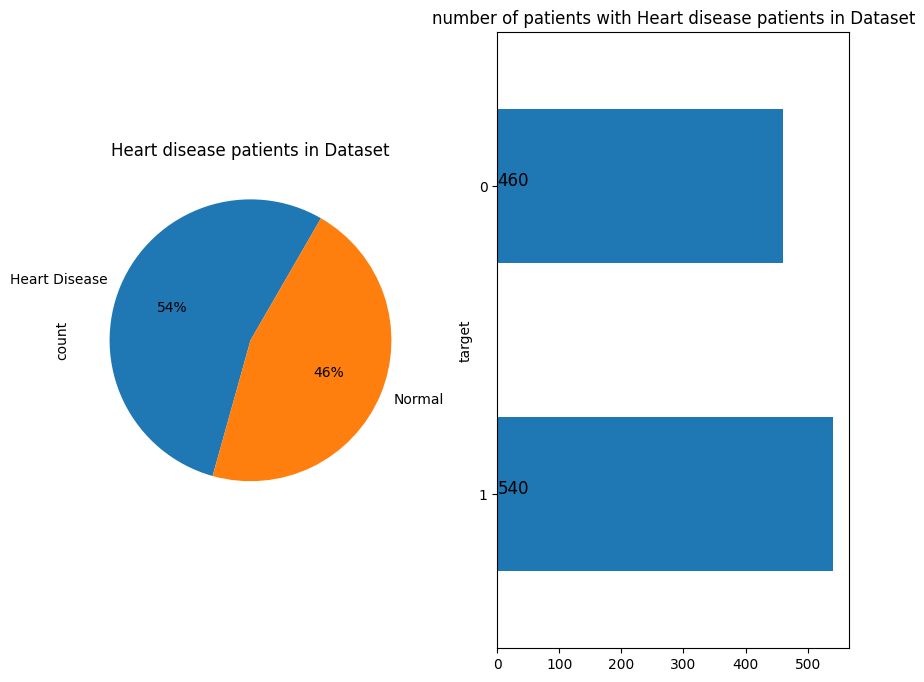

In [ ]:
# Plotting heart disease of patients
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,8))

# Plotting a pie chart
ax1 = df['target'].value_counts().plot.pie(
    x="Heart disease",
    y ='no.of patients',
    autopct = "%1.0f%%",
    labels=["Heart Disease","Normal"],
    startangle = 60,
    ax=ax1
);
ax1.set(title = 'Heart disease patients in Dataset')

# Plotting a horizontal bar chart
ax2 = df["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'number of patients with Heart disease patients in Dataset')

# Show the plot
plt.show()

more proof that its balanaced

lets check the correlation and draw the heat map

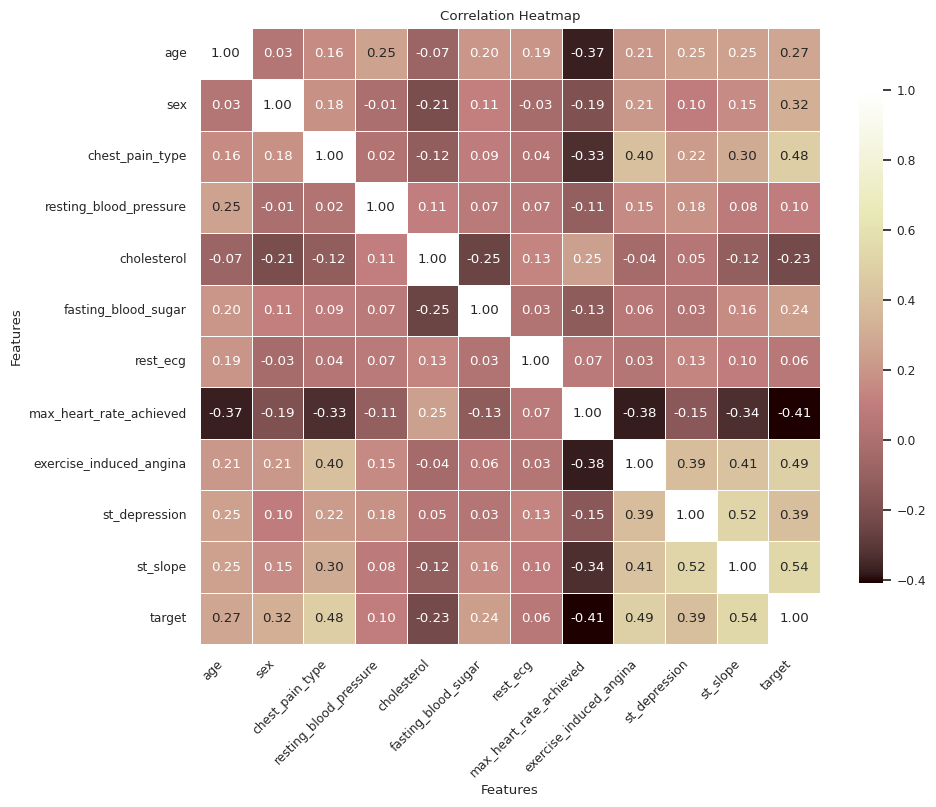

In [ ]:
correlation_matrix = df.corr()

def plot_heatmap(all_correlations, columns):
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    sns.set(font_scale=0.8)  # Adjust the font size for better readability

    # Create a heatmap using Seaborn
    ax = sns.heatmap(correlation_matrix, annot=True, cmap='pink', fmt='.2f',
                     xticklabels=columns, yticklabels=columns,
                     cbar_kws={'shrink': .8}, linewidths=.5)

    # Add labels and a title
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.title('Correlation Heatmap')

    # Improve layout to accommodate labels
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better fit
    plt.yticks(rotation=0)  # Ensure y labels are horizontal for readability

    plt.show()

# Extract column names for labels
columns = df.columns

# Call the plotting function
plot_heatmap(correlation_matrix, columns)

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive. Next, lets take a look at the histograms for each variable.

# Data Processing and Regularization

---



## Analyzing each important feature


###chest pain type

<ipython-input-13-f4c0979ca3cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chest_pain_type', data=attr_0, ax=axs[0], palette='pastel')
<ipython-input-13-f4c0979ca3cd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chest_pain_type', data=attr_1, ax=axs[1], palette='viridis')


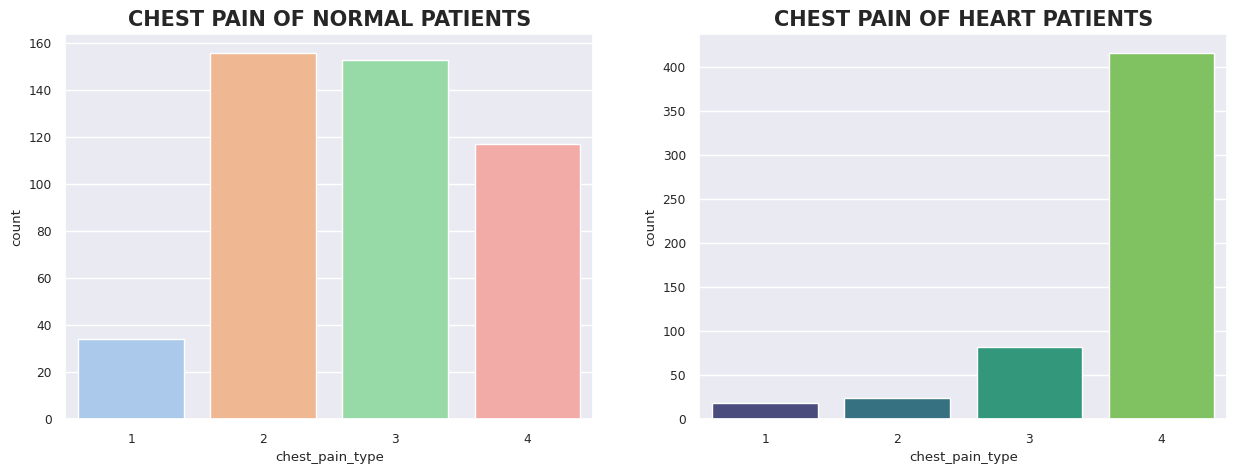

In [ ]:
attr_1 = df[df['target'] == 1]
attr_0 = df[df['target'] == 0]

# Set up the figure with specified size
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting normal patients
sns.countplot(x='chest_pain_type', data=attr_0, ax=axs[0], palette='pastel')
axs[0].set_title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, fontweight='bold')

# Plotting heart patients
sns.countplot(x='chest_pain_type', data=attr_1, ax=axs[1], palette='viridis')
axs[1].set_title('CHEST PAIN OF HEART PATIENTS', fontsize=15, fontweight='bold')

# Show the plot
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
1,7.390000,3.330000
2,33.910000,4.440000
3,33.260000,15.190000
4,25.430000,77.040000


As we can see 77% of heart disease patients have type 4 chest pain type

###Rest ecg

<ipython-input-15-925c4c2bb87c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attr_1['rest_ecg'], palette='viridis', ax=ax2)


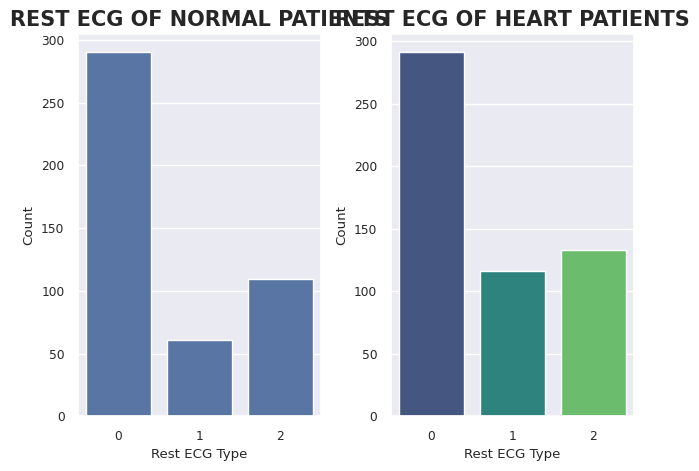

In [ ]:
# Plotting rest_ecg for normal patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(x=attr_0['rest_ecg'], ax=ax1)
ax1.set_title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')
ax1.set_xlabel('Rest ECG Type')  #label the x-axis
ax1.set_ylabel('Count')  #label the y-axis

# Plotting rest_ecg for heart patients
ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x=attr_1['rest_ecg'], palette='viridis', ax=ax2)
ax2.set_title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold')
ax2.set_xlabel('Rest ECG Type')  #label the x-axis
ax2.set_ylabel('Count')  #label the y-axis

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
0,63.040000,53.890000
1,13.260000,21.480000
2,23.700000,24.630000


It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 53% heart disease patients have normal ECG

###ST slope

<ipython-input-17-898090ccd529>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attr_1['st_slope'], palette='viridis', ax=ax2)


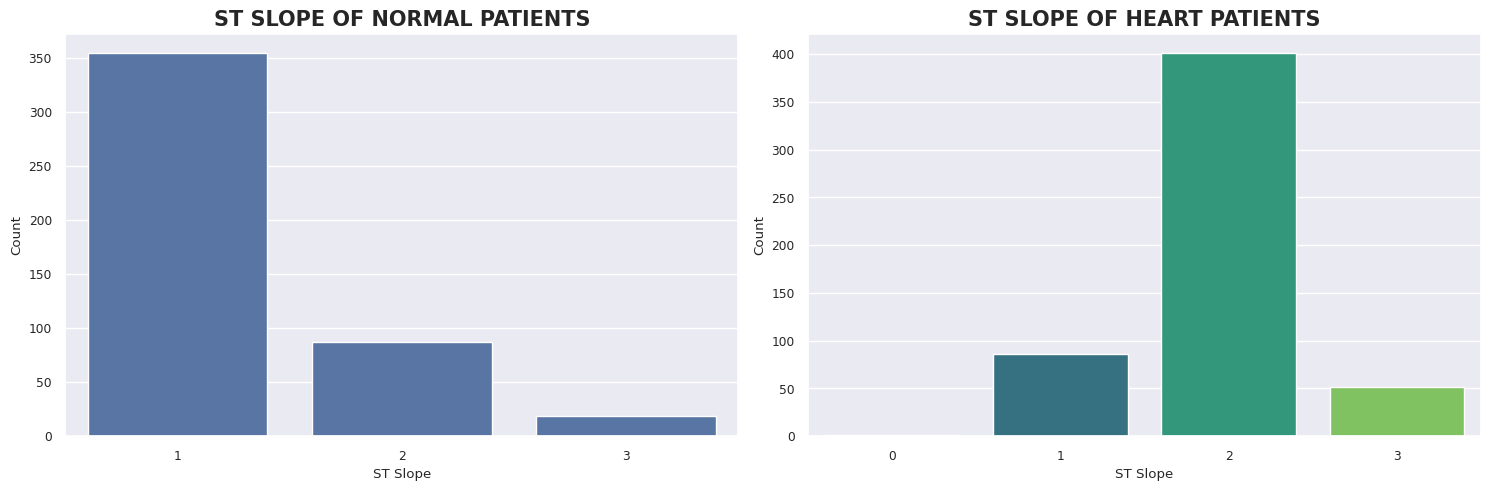

In [ ]:
# Create a figure and define the grid layout
fig = plt.figure(figsize=(15, 5))

# Plotting ST Slope for normal patients
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(x=attr_0['st_slope'], ax=ax1)
ax1.set_title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')
ax1.set_xlabel('ST Slope')  # Label the x-axis
ax1.set_ylabel('Count')  # Label the y-axis

# Plotting ST Slope for heart patients
ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x=attr_1['st_slope'], palette='viridis', ax=ax2)
ax2.set_title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold')
ax2.set_xlabel('ST Slope')  # Label the x-axis
ax2.set_ylabel('Count')  # Label the y-axis

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
0,0.000000,0.190000
1,76.960000,15.930000
2,18.910000,74.260000
3,4.130000,9.630000


##Studying the numerical features

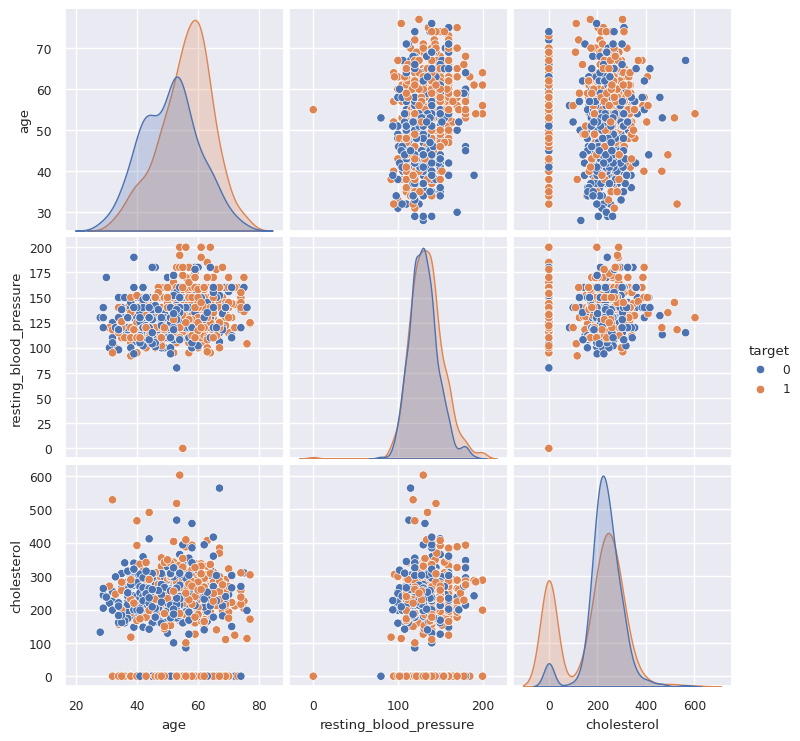

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

##Remove the outliers

In [ ]:
df_numeric = df[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [ ]:
df_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [ ]:
z = np.abs(stats.zscore(df_numeric))
print(z)

          age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0    1.457403                0.422862     0.802625                 1.329301
1    0.492945                1.516943     0.219063                 0.700400
2    1.778889                0.124178     0.746385                 1.579368
3    0.600107                0.313454     0.099629                 1.186304
4    0.042865                0.969903     0.078464                 0.636016
..        ...                     ...          ...                      ...
995  0.792999                0.671219     0.530800                 0.071498
996  1.564565                0.780627     0.146495                 0.071498
997  0.792999                0.696383     0.971344                 0.307336
998  0.257189                0.397698     0.427694                 0.228724
999  0.171459                0.780627     0.162823                 2.036815

[1000 rows x 4 columns]


mm not very helpful

In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 76, 109, 149, 242, 366, 391, 400, 450, 593, 618, 734, 761]), array([2, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1]))


In [ ]:
df.shape #before
#filtering outliers retaining only those data points which are below threshhold
df = df[(z < 3).all(axis=1)]
# checking shape of dataset after outlier removal
df.shape

(988, 12)

lets split the dummies

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# checking the shape of dataset
df.shape
# segregating dataset into features
X = df.drop(['target'],axis=1)
y = df['target']

## Importing the Data Again

now since we want one to train lets import the data again

In [ ]:
# Read the CSV file into a DataFrame
df_testing = pd.read_csv("/content/heart_disease.csv")

# Display
df_testing

df_testing.columns = ['patient id','age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

X_testing = df_testing.drop(columns=['patient id'])
X_testing

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,61,1,4,120,260,0,0,140,1,3.6,2,1
996,39,1,4,118,219,0,0,140,0,1.2,2,1
997,61,0,4,145,307,0,2,146,1,1.0,2,1
998,56,1,4,125,249,1,2,144,1,1.2,2,1


In [ ]:
df.groupby('target').mean()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope
target,,,,,,,,,,,
0,50.868996,0.644105,2.768559,130.207424,229.002183,0.115721,0.604803,149.506550,0.137555,0.462445,1.270742
1,55.950943,0.905660,3.660377,133.509434,180.179245,0.315094,0.707547,128.567925,0.618868,1.303962,1.930189


lets split our data!

In [ ]:
X = df.drop('target', axis=1)  # Drop the target column to form the feature set
y = df['target']               # The target variable

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_testing = df.drop('target', axis=1)

In [ ]:
X_train

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope
878,60,1,4,130,206,0,2,132,1,2.4,2
218,54,1,3,120,217,0,0,137,0,0.0,1
298,57,1,4,110,0,1,1,131,1,1.4,1
49,41,1,4,110,289,0,0,170,0,0.0,2
891,41,0,2,130,204,0,2,172,0,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...
107,34,1,2,150,214,0,1,168,0,0.0,1
274,55,1,3,120,220,0,2,134,0,0.0,1
872,71,0,2,160,302,0,0,162,0,0.4,1
442,69,1,4,130,0,1,1,129,0,1.0,2


### Standerdize and Normalize.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler only on the training data

# Transform the training and test datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transform the separate testing dataset
X_testing_scaled = scaler.transform(X_testing)

In [ ]:
norm = Normalizer()
norm.fit(X_train)

# transform training and testing sets of the Training dataset
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)
# transform Testing dataset
X_testing_norm = norm.transform(X_testing)

In [ ]:
# Display more rows and columns for better visibility
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

# Display the first few rows of the original and normalized features
print("Original Features:")
print(X_train.head(5))

print("\nNormalized Features (First 5 Rows):")
print(pd.DataFrame(X_train_norm[:5, :], columns=X.columns))

Original Features:
     age  sex  chest_pain_type  resting_blood_pressure  cholesterol  ...  \
878   60    1                4                     130          206  ...   
218   54    1                3                     120          217  ...   
298   57    1                4                     110            0  ...   
49    41    1                4                     110          289  ...   
891   41    0                2                     130          204  ...   

     rest_ecg  max_heart_rate_achieved  exercise_induced_angina  \
878         2                      132                        1   
218         0                      137                        0   
298         1                      131                        1   
49          0                      170                        0   
891         2                      172                        0   

     st_depression  st_slope  
878            2.4         2  
218            0.0         1  
298            1.4         1

##Feature selection were gonna use PCA

In [ ]:
df_features = df.drop(['target'], axis = 1)

we always standerdize for...fun idk

In [ ]:
standarized = StandardScaler()
standarized.fit(df_features)

StandardScaler()

In [ ]:
scaled_data = standarized.transform(df_features)

for training(og)

hard part oh no choosing comp number

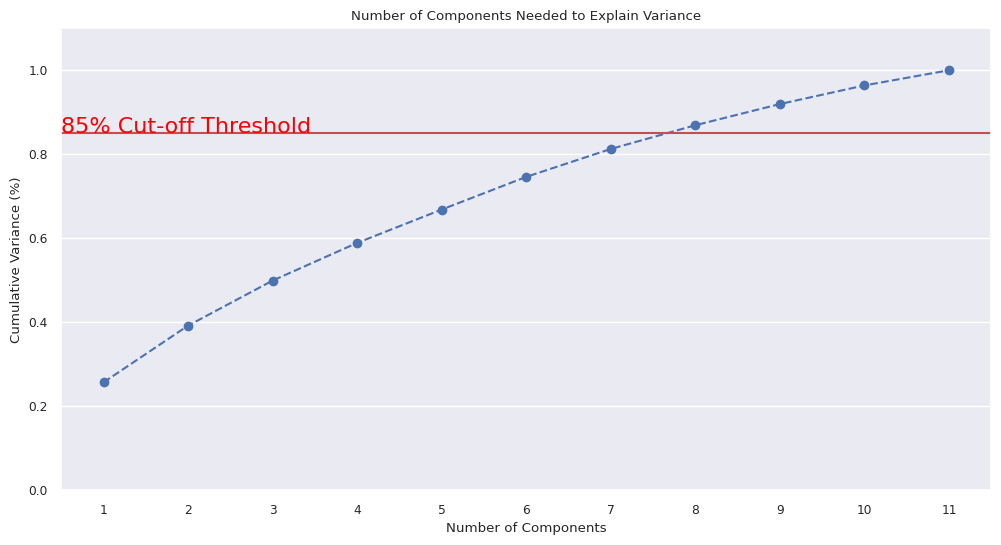

Number of components needed to reach 85% variance: 8


In [ ]:
pca = PCA().fit(scaled_data)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_85 = np.argmax(cumulative_variance_ratio >= 0.85) + 1

# Plot cumulative explained variance
plt.rcParams["figure.figsize"] = (12, 6)
fig, ax = plt.subplots()

xi = np.arange(1, pca.n_components_ + 1, step=1)
y = cumulative_variance_ratio

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, pca.n_components_ + 1, step=1))
plt.ylabel('Cumulative Variance (%)')
plt.title('Number of Components Needed to Explain Variance')

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% Cut-off Threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Print the number of components needed to reach 95% variance
print("Number of components needed to reach 85% variance:", n_components_85)

In [ ]:
pca = PCA(n_components = 8)
pca.fit(scaled_data)

PCA(n_components=8)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(988, 11)

In [ ]:
x_pca.shape

(988, 8)

In [ ]:
def diagnosis(x):
  if x == 1:
    return 1
  else:
    return 0
df_diag = df['target'].apply(diagnosis)

In [ ]:
y2 = df['target']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    x_pca, y2 , test_size=0.33, random_state=42)

In [ ]:
#Plotting the principal components to see their relations
weights = x_pca[:1]

sorted_feature_indices = np.argsort(weights)

# Get the names of features based on the sorted indices
sorted_feature_names = df_features.columns[sorted_feature_indices[0]]

for i in range (len(sorted_feature_names)):
  print("Most important features in principal component %d: " %(i + 1), sorted_feature_names[i])

Most important features in principal component 1:  age
Most important features in principal component 2:  fasting_blood_sugar
Most important features in principal component 3:  chest_pain_type
Most important features in principal component 4:  rest_ecg
Most important features in principal component 5:  sex
Most important features in principal component 6:  max_heart_rate_achieved
Most important features in principal component 7:  resting_blood_pressure
Most important features in principal component 8:  cholesterol


In [ ]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

In [ ]:
df_pc

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,...,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope
0,0.328829,0.217687,0.345633,0.164107,-0.155300,...,0.075829,-0.393347,0.416173,0.360504,0.423432
1,0.173784,-0.313537,-0.107515,0.359579,0.585412,...,0.397335,0.189747,0.064577,0.322259,0.074643
2,0.483231,-0.150756,-0.259416,0.360555,-0.199073,...,0.222505,-0.055187,-0.299546,-0.196926,-0.156229
3,0.119020,-0.143988,-0.030487,0.493451,0.117053,...,-0.666714,-0.336809,0.118629,-0.157355,-0.211463
4,-0.259803,0.549431,-0.371896,0.395779,0.021238,...,-0.226248,0.364591,-0.002356,0.301765,0.110948
5,-0.067291,-0.621736,-0.220044,-0.191317,-0.126421,...,-0.388351,0.082979,-0.079587,0.355015,0.406337
6,0.312836,0.212507,-0.578017,-0.196225,-0.245406,...,0.065341,-0.260966,-0.198743,0.128046,0.154832
7,0.238262,0.203664,-0.245345,-0.432474,0.660898,...,-0.186840,-0.183405,0.129858,-0.118776,0.014170


Text(155.75, 0.5, 'Principal Components')

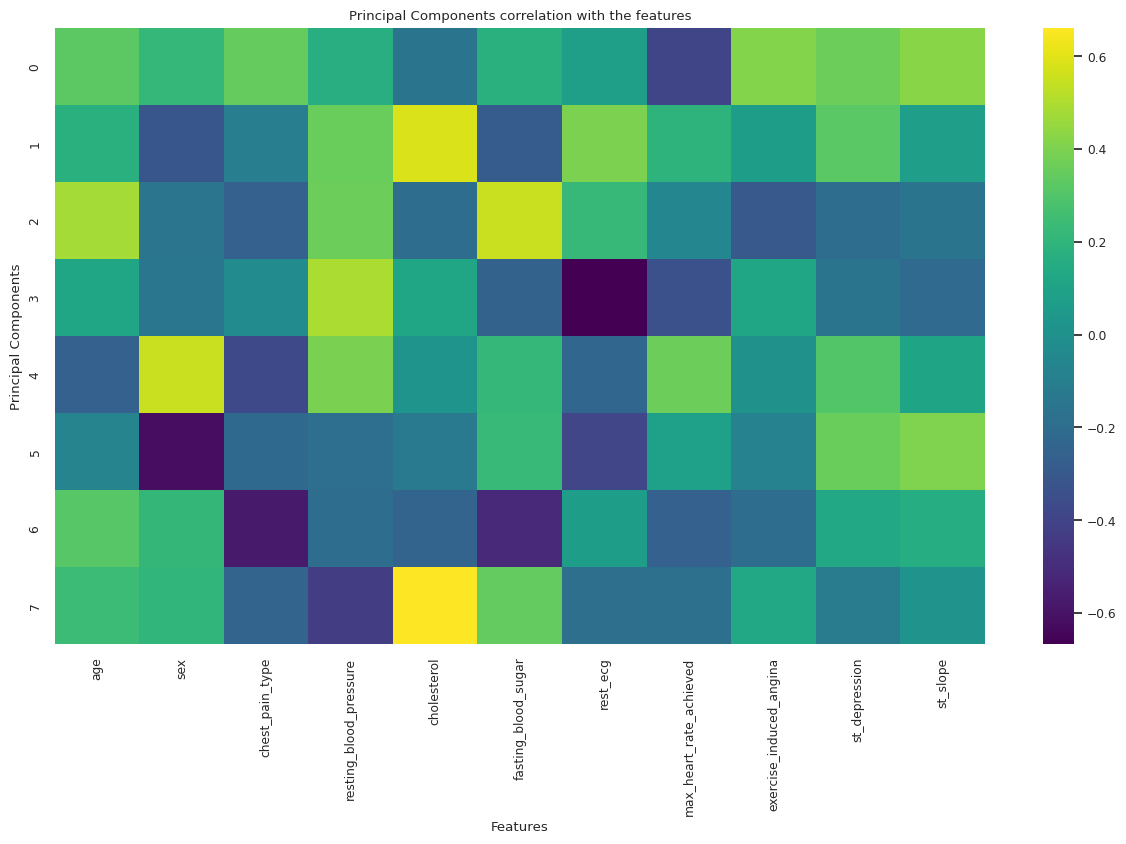

In [ ]:
# heatmap to visualise the correlation between various features and the principal components.
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

for the smol testing, (IE training data)

In [ ]:
#pca on testing dataset that should be standardized
X_testing_standardized = standarized.fit_transform(X_testing)

# Perform PCA
X_testing_pca = pca.fit_transform(X_testing_standardized)

# Model choosing

---



## Random Forest

lets use Random Forest first because its the best model(totally bias)

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)

# Train the model using the entire training set
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_test)

# Evaluate the model's accuracy (no hyperparameter tuning)
acc_rf = accuracy_score(y_test, y_pred)
print("RF Accuracy:", acc_rf)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

RF Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        90
           1       0.86      0.95      0.90       108

    accuracy                           0.89       198
   macro avg       0.90      0.88      0.89       198
weighted avg       0.89      0.89      0.89       198

Confusion Matrix:
 [[ 73  17]
 [  5 103]]


### RF with normalization

In [ ]:
# Train RF model with normalized features
forest_clf_normalized = RandomForestClassifier(random_state=42)
forest_clf_normalized.fit(X_train_norm, y_train)

# Make predictions on the test set
y_pred = forest_clf_normalized.predict(X_test_norm)

# Evaluate the model's accuracy]
acc_rf_norm = accuracy_score(y_test, y_pred)
print("RF Accuracy:", acc_rf_norm)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

RF Accuracy: 0.9040404040404041
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89        90
           1       0.89      0.94      0.91       108

    accuracy                           0.90       198
   macro avg       0.91      0.90      0.90       198
weighted avg       0.91      0.90      0.90       198

Confusion Matrix:
 [[ 77  13]
 [  6 102]]


### RF with pca

In [ ]:
# Train RF with PCA features
forest_clf_pca = RandomForestClassifier(random_state=42)

forest_clf_pca.fit(X_train_pca, y_train_pca)
y_pred = forest_clf_pca.predict(X_test_pca)

# Evaluate the model's accuracy
acc_rf_pca = accuracy_score(y_test_pca, y_pred)
print("RF Accuracy with PCA:", acc_rf_pca)
# Generate a classification report
class_report = classification_report(y_test_pca, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_pca, y_pred)
print("Confusion Matrix:\n", conf_matrix)

RF Accuracy with PCA: 0.8746177370030581
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       137
           1       0.89      0.90      0.89       190

    accuracy                           0.87       327
   macro avg       0.87      0.87      0.87       327
weighted avg       0.87      0.87      0.87       327

Confusion Matrix:
 [[115  22]
 [ 19 171]]


###RF with outliers removal

In [ ]:
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

91.92
931


In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 91.92 %


##Logistic reg

In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur

# Train the model
log_reg.fit(X_train, y_train)
# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8181818181818182
Confusion Matrix:
 [[69 21]
 [15 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        90
           1       0.82      0.86      0.84       108

    accuracy                           0.82       198
   macro avg       0.82      0.81      0.82       198
weighted avg       0.82      0.82      0.82       198



### LR with normalization

In [ ]:
lr_norm = LogisticRegression(C=2)

lr_norm.fit(X_train_norm, y_train)

y_pred = lr_norm.predict(X_test_norm)

# Evaluate the model's accuracy
acc_lr_norm = accuracy_score(y_test, y_pred)
print("LR Accuracy:", acc_lr_norm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

LR Accuracy: 0.702020202020202
Confusion Matrix:
 [[63 27]
 [32 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68        90
           1       0.74      0.70      0.72       108

    accuracy                           0.70       198
   macro avg       0.70      0.70      0.70       198
weighted avg       0.70      0.70      0.70       198



### LR scaled


In [ ]:
lr_scaled = LogisticRegression(C=2)

lr_scaled.fit(X_train_scaled, y_train)

y_pred = lr_scaled.predict(X_test_scaled)

# Evaluate the model's accuracy
acc_lr_st = accuracy_score(y_test, y_pred)
print("LR Accuracy:", acc_lr_st)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

LR Accuracy: 0.8181818181818182
Confusion Matrix:
 [[69 21]
 [15 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        90
           1       0.82      0.86      0.84       108

    accuracy                           0.82       198
   macro avg       0.82      0.81      0.82       198
weighted avg       0.82      0.82      0.82       198



### LR with PCA

In [ ]:
lr_pca = LogisticRegression(C=2)

lr_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = lr_pca.predict(X_test_pca)

# Evaluate the model's accuracy
acc_lr_pca = accuracy_score(y_test_pca, y_pred_pca)
print("LR Accuracy:", acc_lr_pca)
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_pca))

LR Accuracy: 0.8195718654434251
Confusion Matrix:
 [[108  29]
 [ 30 160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       137
           1       0.85      0.84      0.84       190

    accuracy                           0.82       327
   macro avg       0.81      0.82      0.81       327
weighted avg       0.82      0.82      0.82       327



## Gradient Boosting

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
acc_gbm = accuracy_score(y_test, y_pred_gbm)
print("GBM Accuracy:", acc_gbm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))
print("Classification Report:\n", classification_report(y_test, y_pred_gbm))

GBM Accuracy: 0.8686868686868687
Confusion Matrix:
 [[ 71  19]
 [  7 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85        90
           1       0.84      0.94      0.89       108

    accuracy                           0.87       198
   macro avg       0.88      0.86      0.87       198
weighted avg       0.87      0.87      0.87       198



# Re-checking features using RFE

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
upper_triangle = correlation_matrix.where(mask)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]
df_reduced = df.drop(to_drop, axis=1)

X = df_reduced.drop('target', axis=1)
y = df_reduced['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Logistic Regression model to use in RFE
logistic_model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logistic_model, n_features_to_select=5)
rfe.fit(X_scaled, y)

# Select features based on RFE outcome
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Extract the reduced set based on selected features
X_reduced = X[selected_features]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


Selected Features: Index(['sex', 'chest_pain_type', 'fasting_blood_sugar',
       'exercise_induced_angina', 'st_slope'],
      dtype='object')


## RF with normalization 2

since rf with normalization was the best well improve on that

In [ ]:
# Define the selected features and target
selected_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'exercise_induced_angina', 'st_slope']
X = df[selected_features]
y = df['target']

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest Classifier with normalization
forest_clf_normalized = RandomForestClassifier(random_state=42)
forest_clf_normalized.fit(X_train, y_train)

# Predict on the test set
y_pred = forest_clf_normalized.predict(X_test)

# Evaluate the model's accuracy
acc_rf_norm = accuracy_score(y_test, y_pred)
print("RF Accuracy:", acc_rf_norm)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


RF Accuracy: 0.8434343434343434
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.81        90
           1       0.82      0.92      0.86       108

    accuracy                           0.84       198
   macro avg       0.85      0.84      0.84       198
weighted avg       0.85      0.84      0.84       198

Confusion Matrix:
 [[68 22]
 [ 9 99]]


## L1

it got worse using the features lets try l1 on it

In [ ]:
# Prepare the dataset
X = df.drop(columns="target")
y = df["target"]

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply L1 regularization (Lasso) for feature selection
lasso = Lasso(alpha=0.01)
feature_selector = SelectFromModel(lasso)
X_selected = feature_selector.fit_transform(X_scaled, y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Display the sizes of the sets
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

# Train the RandomForestClassifier on the selected features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Validate the model on the validation set
y_pred_val = rf.predict(X_val)

# Evaluate the accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Set Accuracy:", accuracy_val)

# Generate a classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)
print("Validation Set Classification Report:\n", class_report_val)

# Create a confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
print("Validation Set Confusion Matrix:\n", conf_matrix_val)

# Test the model on the test set
y_pred_test = rf.predict(X_test)

# Evaluate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# Generate a classification report for the test set
class_report_test = classification_report(y_test, y_pred_test)
print("Test Set Classification Report:\n", class_report_test)

# Create a confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Test Set Confusion Matrix:\n", conf_matrix_test)


Training set size: 691
Validation set size: 198
Test set size: 99
Validation Set Accuracy: 0.898989898989899
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88        89
           1       0.86      0.97      0.91       109

    accuracy                           0.90       198
   macro avg       0.91      0.89      0.90       198
weighted avg       0.91      0.90      0.90       198

Validation Set Confusion Matrix:
 [[ 72  17]
 [  3 106]]
Test Set Accuracy: 0.9191919191919192
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.95      0.92      0.94        63

    accuracy                           0.92        99
   macro avg       0.91      0.92      0.91        99
weighted avg       0.92      0.92      0.92        99

Test Set Confusion Matrix:
 [[33  3]
 [ 5 58]]


the model is prefornming well on the test data but doesnt seem to change on the validation

## L2

Lets try doing L1s enemy, L2(dun dun dun, imagine music ma maana masare nhot effects)

In [ ]:
# Scale your features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the RandomForestClassifier on the scaled features
rf = RandomForestClassifier()
rf.fit(X_scaled, y)

RandomForestClassifier()

In [ ]:
# Split the data into training, validation, and test sets
# a common split is 70% training, 15% validation, and 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [ ]:
# Train the RandomForestClassifier on the selected features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Use the trained classifier to make predictions on the validation set
y_pred = rf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89        89
           1       0.87      0.98      0.92       109

    accuracy                           0.91       198
   macro avg       0.92      0.90      0.91       198
weighted avg       0.92      0.91      0.91       198

Confusion Matrix:
 [[ 73  16]
 [  2 107]]


now lets make an instance on our best model the l1(goat), but lets tweak our paramters abit

In [ ]:
# Create a Random Forest Classifier instance
best_rf_l1 = RandomForestClassifier(n_estimators=200,
                                 bootstrap=False,
                                 criterion='gini',
                                 max_depth=20,
                                 max_features='log2',
                                 n_jobs=-1,
                                 random_state=42)

# Fit the classifier to the training data
best_rf_l1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Use the trained classifier to make predictions on the validation set
y_pred = best_rf_l1.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.898989898989899
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        89
           1       0.87      0.95      0.91       109

    accuracy                           0.90       198
   macro avg       0.91      0.89      0.90       198
weighted avg       0.90      0.90      0.90       198

Confusion Matrix:
 [[ 74  15]
 [  5 104]]


In [ ]:
# Use the trained classifier to make predictions on the test set
y_pred = best_rf_l1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9292929292929293
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.95      0.94      0.94        63

    accuracy                           0.93        99
   macro avg       0.92      0.93      0.92        99
weighted avg       0.93      0.93      0.93        99

Confusion Matrix:
 [[33  3]
 [ 4 59]]


#Model evaluation

After evaluating multiple models for predicting heart disease, including different configurations of Random Forest classifiers, several performance metrics were examined to gauge their effectiveness. The accuracy, precision, recall, and F1-score provided a comprehensive assessment of the models' performance. Notably, the best-performing model, Random Forest with specific hyperparameters, demonstrated impressive accuracy and balanced precision and recall, which is essential for addressing false positives and false negatives in a medical diagnosis context.

In terms of meaningful interpretation, the accuracy metric offered a clear view of overall correctness, while precision and recall highlighted the models' capabilities in predicting positive and negative cases accurately. The F1-score, as a harmonic mean of precision and recall, provided an insightful measure of the models' balance between sensitivity and specificity.

Comparing the models, the Random Forest model with optimized hyperparameters outperformed others, likely due to its robust handling of feature interactions and ability to manage overfitting through parameter tuning. This model's success was attributed to its effective use of ensemble learning and flexibility in feature selection.

Potential areas for improvement include further hyperparameter tuning, experimenting with feature engineering, and exploring other ensemble methods or neural networks for comparison. Limitations in model evaluation included the potential for bias in the dataset and the need for more extensive cross-validation to ensure generalizability. Despite these challenges, the evaluated models provided valuable insights into heart disease prediction, with promising avenues for future enhancement.